<a href="https://colab.research.google.com/github/dcastf01/aena_scrapping_licitaciones/blob/main/clean_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install pycaret
!pip install pyvis


In [2]:
# !pip install --upgrade gensim


In [3]:
!git clone https://github.com/dcastf01/aena_scrapping_licitaciones.git

Cloning into 'aena_scrapping_licitaciones'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 56 (delta 25), reused 44 (delta 21), pack-reused 0
Unpacking objects: 100% (56/56), done.


In [4]:
%cd aena_scrapping_licitaciones

/content/aena_scrapping_licitaciones


In [5]:
#@title Imports
import pandas as pd
import nltk
import gensim.downloader as api
from nltk.tokenize.treebank import TreebankWordDetokenizer


'pattern' package not found; tag filters are not available for English


In [6]:
import os
import pandas as pd
import nltk
import gensim.downloader as api
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from nltk.tokenize.treebank import TreebankWordDetokenizer
import matplotlib.pyplot as plt

##Clean of data


cambiar idea por contratos no licitaciones

In [7]:
folder_with_data='data'
name_file='raw_data.csv'
input_file=os.path.join(folder_with_data,name_file)
df=pd.read_csv(input_file)
print('shape',df.shape)
print('initial colums \n',df.columns)
#select the columns we don't want
columns_to_drop=[
                 'Título', #duplicated and the other has better naming
                 'Contrato e Incidencias',
                 'url_with_details',
                 'Nº de expediente:',#duplicated
                 'Duración:',#this column is 'Fecha fin actual' - 'Fecha de inicio' 
                 'Descarga de pliegos:',
                 'Tipo incidencia',
                 ]
#columns in datatime format
datetime_columns=['Fecha de Contrato','Fecha de inicio', 'Fecha fin actual']
#numeric columns
numeric_columns=[ 'Importe bruto adjudicación(€)', 'Importe neto adjudicación(€)','Valor estimado contrato neto(€)',
                 'Importe bruto licitación:',
                 'Importe neto licitación:',
                 'Importe bruto adjudicación:',
                 'Importe neto adjudicación:',
                 'Valor estimado contrato neto:',
                 
                 ]

shape (9422, 27)
initial colums 
 Index(['Fecha de Contrato', 'Nº Expediente', 'Título', 'Destino',
       'Importe bruto adjudicación(€)', 'Importe neto adjudicación(€)',
       'Valor estimado contrato neto(€)', 'Contrato e Incidencias',
       'url_with_details', 'Nº de expediente:', 'Título:', 'Fecha de inicio',
       'Fecha fin actual', 'Duración:', 'Importe bruto licitación:',
       'Importe neto licitación:', 'Importe bruto adjudicación:',
       'Importe neto adjudicación:', 'Valor estimado contrato neto:',
       'Forma adjudicación:', 'Número de licitadores:',
       'Incidencias del contrato:', 'NIF', 'Razón social:',
       'Descarga de pliegos:', 'Tipo incidencia', 'Unnamed: 26'],
      dtype='object')


In [8]:
#drop innecesary columns
df.drop(columns_to_drop,axis=1,inplace=True)
df.drop_duplicates(inplace=True)#sometimes the last row is the first in the next page

In [9]:
df.head()

Fecha de Contrato   Nº Expediente                    Destino  \
0               NaN  DPM-280/2014-2         VARIOS AEROPUERTOS   
1        21.06.2022     TFN-21/2022        APTO.TENERIFE NORTE   
2        21.06.2022  BCN-156/2022-1  APTO.J.TARRAD BARCELONA P   
3        17.06.2022     GRO-66/2022    APTO.GIRONA-COSTA BRAVA   
4        17.06.2022     PMI-42/2022     APTO.PALMA DE MALLORCA   

  Importe bruto adjudicación(€) Importe neto adjudicación(€)  \
0                          0,00                         0,00   
1                    200.732,00                   187.600,00   
2                     17.787,00                    14.700,00   
3                    118.399,58                    97.850,89   
4                     78.650,70                    65.000,58   

  Valor estimado contrato neto(€)  \
0                    4.000.000,00   
1                      227.690,00   
2                       17.459,00   
3                       99.000,00   
4                       76.471,27   

                                             Título: Fecha de inicio  \
0  A.M. PROYECTO Y EJECUCIÓN AISLAMIENTO ACÚSTICO...             NaN   
1  ADAPTACIÓN AL CUMPLIMIENTO DE NORMATIVA ENTRY-...      21/07/2023   
2  SUMINISTRO DE REPUESTOS PARA LOS GRUPOS ELECTR...      21/07/2022   
3  ACTUALIZACIÓN DEL SISTEMA GEMYC Y ADAPTACIÓN A...      27/06/2022   
4  NUEVA CLIMATIZACIÓN EN SALAS VIP DEL AEROPUERT...      17/06/2022   

  Fecha fin actual Importe bruto licitación: Importe neto licitación:  \
0       26/03/2018            4.840.000,00 €           4.000.000,00 €   
1       21/11/2023              243.628,30 €             227.690,00 €   
2       21/09/2022               21.125,39 €              17.459,00 €   
3       27/10/2022              119.790,00 €              99.000,00 €   
4       17/10/2022               92.530,24 €              76.471,27 €   

  Importe bruto adjudicación: Importe neto adjudicación:  \
0                      0,00 €                     0,00 €   
1                200.732,00 €               187.600,00 €   
2                 17.787,00 €                14.700,00 €   
3                118.399,58 €                97.850,89 €   
4                 78.650,70 €                65.000,58 €   

  Valor estimado contrato neto:                          Forma adjudicación:  \
0                4.000.000,00 €  PROCEDIMIENTO DE LICITACIÓN CON NEGOCIACIÓN   
1                  227.690,00 €       PROCEDIMIENTO ABIERTO VARIOS CRITERIOS   
2                   17.459,00 €           PROCEDIMIENTO ABIERTO SIMPLIFICADO   
3                   99.000,00 €           PROCEDIMIENTO ABIERTO SIMPLIFICADO   
4                   76.471,27 €           PROCEDIMIENTO ABIERTO SIMPLIFICADO   

   Número de licitadores: Incidencias del contrato:         NIF  \
0                       9                         0         NaN   
1                       4                         0  B076675735   
2                       1                         0  B081952913   
3                       1                         0  A019024249   
4                       4                         0  U010796522   

         Razón social: Unnamed: 26  
0                  NaN         NaN  
1  INTEDESER GLOBAL SL         NaN  
2      ALCANER 2000 SL         NaN  
3    AMPER SISTEMAS SA         NaN  
4   UTE EFS - EUROFRED         NaN

In [10]:
#set the correct dtype per columns
for datetime_column in datetime_columns:
    if 'Fecha de Contrato'==datetime_column:
        format='%d.%m.%Y'
    else:
        format='%d/%m/%Y'
    df[datetime_column]=pd.to_datetime(df[datetime_column],format=format,errors='coerce')
for numeric_column in numeric_columns:
    df[numeric_column]=df[numeric_column].str.replace("€","")
    df[numeric_column]=df[numeric_column].str.replace(".","")
    df[numeric_column]=df[numeric_column].str.replace(",",".")
    df[numeric_column]=df[numeric_column].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


###creating new features

In [11]:
df['duration_days']=(df['Fecha fin actual']-df['Fecha de inicio']).dt.days
df['Valor estimado contrato neto(€)_per_day']=df['Valor estimado contrato neto(€)']/df['duration_days']

In [12]:
df.dtypes

Fecha de Contrato                          datetime64[ns]
Nº Expediente                                      object
Destino                                            object
Importe bruto adjudicación(€)                     float64
Importe neto adjudicación(€)                      float64
Valor estimado contrato neto(€)                   float64
Título:                                            object
Fecha de inicio                            datetime64[ns]
Fecha fin actual                           datetime64[ns]
Importe bruto licitación:                         float64
Importe neto licitación:                          float64
Importe bruto adjudicación:                       float64
Importe neto adjudicación:                        float64
Valor estimado contrato neto:                     float64
Forma adjudicación:                                object
Número de licitadores:                              int64
Incidencias del contrato:                          object
NIF           

##Insights

### Creating report to have insights

In [ ]:
report=create_report(df.drop(['Importe bruto licitación:','duration_days'],axis=1))
report.save()

E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'Importe neto ...ón:'


Report has been saved to /content/report.html!


###Main insights from this report
    * We have a Nº Expediente with several repetitions
    * We have a few values in the fields with "Importe" that break all the numeric análisis
    * Elecnor is the company with more "Licitaciones"
    * Exist contracts with 0

### contracts with import 0

In [ ]:
df[df['Importe bruto adjudicación(€)']==0]

Fecha de Contrato     Nº Expediente                    Destino  \
0                  NaT    DPM-280/2014-2         VARIOS AEROPUERTOS   
121         2022-05-12    DEA-299/2021-2              APTO.ZARAGOZA   
441         2022-01-12  DTC-112/2021-110         VARIOS AEROPUERTOS   
511         2021-12-14     DEF-98/2021-1   DIR.ECONOMICO-FINANCIERA   
520         2021-12-13     DEF-98/2021-2   DIR.ECONOMICO-FINANCIERA   
...                ...               ...                        ...   
9043        2015-01-23   DIN-192/2014-12  D PLANIF AER CONTR REGULA   
9044        2015-01-23   DIN-192/2014-15  D PLANIF AER CONTR REGULA   
9045        2015-01-23   DIN-192/2014-16  D PLANIF AER CONTR REGULA   
9122        2014-10-16   DEA-144/2014-12         VARIOS AEROPUERTOS   
9315        2013-11-29   DTC-153/2013-11         VARIOS AEROPUERTOS   

      Importe bruto adjudicación(€)  Importe neto adjudicación(€)  \
0                               0.0                           0.0   
121                             0.0                           0.0   
441                             0.0                           0.0   
511                             0.0                           0.0   
520                             0.0                           0.0   
...                             ...                           ...   
9043                            0.0                           0.0   
9044                            0.0                           0.0   
9045                            0.0                           0.0   
9122                            0.0                           0.0   
9315                            0.0                           0.0   

      Valor estimado contrato neto(€)  \
0                           4000000.0   
121                               0.0   
441                               0.0   
511                               0.0   
520                               0.0   
...                               ...   
9043                              0.0   
9044                              0.0   
9045                              0.0   
9122                              0.0   
9315                              NaN   

                                                Título: Fecha de inicio  \
0     A.M. PROYECTO Y EJECUCIÓN AISLAMIENTO ACÚSTICO...             NaT   
121   PRESTACIÓN A TERCEROS DEL SERVICIO DE ASISTENC...      2022-06-12   
441   ACUERDO MARCO PARA EL SUMINISTRO E INSTALACIÓN...      2022-01-12   
511   SERVICIO DE MEDIACIÓN DE SEGUROS PRIVADOS DE A...      2022-01-14   
520   SERVICIO DE MEDIACIÓN DE SEGUROS PRIVADOS DE A...      2022-01-13   
...                                                 ...             ...   
9043  ACUERDO MARCO. SUMINISTRO Y/O INSTALACIÓN SIST...      2015-02-09   
9044  ACUERDO MARCO. SUMINISTRO Y/O INSTALACIÓN SIST...      2015-02-09   
9045  ACUERDO MARCO. SUMINISTRO Y/O INSTALACIÓN SIST...      2015-02-09   
9122  ACUERDO MARCO 2014-2017 PARA LA ADQUISICIÓN DE...      2014-10-16   
9315  A.M. DE SUMINISTRO E INSTALACIÓN DE EQUIPAMIEN...      2013-12-26   

     Fecha fin actual  Importe bruto licitación:  ...  \
0          2018-03-26                  4840000.0  ...   
121        2029-06-12                        0.0  ...   
441               NaT                        0.0  ...   
511        2024-01-14                        0.0  ...   
520        2024-01-13                        0.0  ...   
...               ...                        ...  ...   
9043       2018-02-09                        0.0  ...   
9044       2018-02-09                        0.0  ...   
9045       2018-02-09                        0.0  ...   
9122       2018-10-16                        0.0  ...   
9315       2017-06-26                        0.0  ...   

      Importe neto adjudicación:  Valor estimado contrato neto:  \
0                            0.0                      4000000.0   
121                          0.0                            0.0   
441                          0.0           

###Checking what happen with the "N* Expediente" most repeated

In [ ]:
df[df['Nº Expediente']=='DTC-83/2015-1']

Fecha de Contrato  Nº Expediente                    Destino  \
8537        2015-01-10  DTC-83/2015-1         VARIOS AEROPUERTOS   
8539        2015-01-10  DTC-83/2015-1  APTO.A.SUAREZ MAD-BARAJAS   
8543        2015-01-10  DTC-83/2015-1  APTO.A.SUAREZ MAD-BARAJAS   
8544        2015-01-10  DTC-83/2015-1  APTO.J.TARRAD BARCELONA P   
8545        2015-01-10  DTC-83/2015-1  APTO.J.TARRAD BARCELONA P   
...                ...            ...                        ...   
8635        2015-01-10  DTC-83/2015-1            HLPTO.ALGECIRAS   
8636        2015-01-10  DTC-83/2015-1                APTO.BURGOS   
8637        2015-01-10  DTC-83/2015-1              APTO.ALBACETE   
8638        2015-01-10  DTC-83/2015-1                HLPTO.CEUTA   
8639        2015-01-10  DTC-83/2015-1             APTO.SON BONET   

      Importe bruto adjudicación(€)  Importe neto adjudicación(€)  \
8537                     3690496.08                    3049996.76   
8539                      747705.36                     617938.31   
8543                      277310.43                     229182.17   
8544                      202671.65                     167497.23   
8545                      170210.12                     140669.52   
...                             ...                           ...   
8635                        5601.43                       4629.28   
8636                        4748.22                       3924.15   
8637                        4716.69                       3898.09   
8638                        3876.47                       3524.06   
8639                        3741.32                       3092.00   

      Valor estimado contrato neto(€)  \
8537                       5336472.99   
8539                       1090994.37   
8543                        393860.37   
8544                        210419.43   
8545                        185172.74   
...                               ...   
8635                          6870.27   
8636                          6921.95   
8637                          7018.77   
8638                          6413.60   
8639                          3648.36   

                                                Título: Fecha de inicio  \
8537  SERVICIOS DE TELECOMUNICACIONES 2016-2019. LOT...      2015-01-10   
8539  MAD.-SERVICIOS DE TELECOMUNICACIONES 2016-2019...      2015-01-10   
8543  MAD.-SERVICIOS DE TELECOMUNICACIONES 2016-2019...      2015-01-10   
8544  BCN.-SERVICIOS DE TELECOMUNICACIONES 2016-2019...      2015-01-10   
8545  BCN.-SERVICIOS DE TELECOMUNICACIONES 2016-2019...      2015-01-10   
...                                                 ...             ...   
8635  AEI.-SERVICIOS DE TELECOMUNICACIONES 2016-2019...      2015-01-10   
8636  RGS.-SERVICIOS DE TELECOMUNICACIONES 2016-2019...      2015-01-10   
8637  ABC.-SERVICIOS DE TELECOMUNICACIONES 2016-2019...      2015-01-10   
8638  JCU.-SERVICIOS DE TELECOMUNICACIONES 2016-2019...      2015-01-10   
8639  SBO.-SERVICIOS DE TELECOMUNICACIONES 2016-2019...      2015-01-10   

     Fecha fin actual  Importe bruto licitación:  ...  \
8537       2019-01-10                 4304754.88  ...   
8539       2022-10-28                  880068.79  ...   
8543       2022-10-28                  317714.03  ...   
8544       2022-10-28                  169738.34  ...   
8545       2022-10-28                  149372.67  ...   
...               ...                        ...  ...   
8635       2022-10-28                    5542.02  ...   
8636       2022-10-28                    5583.70  ...   
8637       2022-10-28                    5661.81  ...   
8638       2022-10-28                    4703.30  ...   
8639       2020-01-05                    2943.01  ...   

      Importe neto adjudicación:  Valor estimado contrato neto:  \
8537                  3049996.76                     5336472.99   
8539                   617938.31                     1090994.37   
8543                   229182.17                      393860.37   
8544        

### We have a value anomalous in relacion "importes" 


In [ ]:
df.sort_values('Importe neto adjudicación(€)',ascending=False) 

Fecha de Contrato     Nº Expediente                    Destino  \
478         2021-12-28      DEA-384/2021         VARIOS AEROPUERTOS   
4499        2018-12-19  SEG-368/2018-100         VARIOS AEROPUERTOS   
9390        2003-04-07    DPB-823/2002-1  APTO.A.SUAREZ MAD-BARAJAS   
72          2022-05-25      DIN-492/2019     APTO.PALMA DE MALLORCA   
6889        2017-04-21      MAD-584/2016  APTO.A.SUAREZ MAD-BARAJAS   
...                ...               ...                        ...   
1194        2021-06-22   SGC-28/2021-134         VARIOS AEROPUERTOS   
1195        2021-06-22   SGC-28/2021-136         VARIOS AEROPUERTOS   
1196        2021-06-22   SGC-28/2021-138         VARIOS AEROPUERTOS   
1197        2021-06-22   SGC-28/2021-139         VARIOS AEROPUERTOS   
0                  NaT    DPM-280/2014-2         VARIOS AEROPUERTOS   

      Importe bruto adjudicación(€)  Importe neto adjudicación(€)  \
478                    7.274669e+08                  6.012123e+08   
4499                   4.598558e+08                  3.800461e+08   
9390                   3.738636e+08                  3.222962e+08   
72                     2.401397e+08                  1.984625e+08   
6889                   1.704890e+08                  1.409000e+08   
...                             ...                           ...   
1194                   0.000000e+00                  0.000000e+00   
1195                   0.000000e+00                  0.000000e+00   
1196                   0.000000e+00                  0.000000e+00   
1197                   0.000000e+00                  0.000000e+00   
0                      0.000000e+00                  0.000000e+00   

      Valor estimado contrato neto(€)  \
478                      6.012123e+08   
4499                     3.800461e+08   
9390                              NaN   
72                       2.239225e+08   
6889                     2.115640e+08   
...                               ...   
1194                              NaN   
1195                              NaN   
1196                              NaN   
1197                              NaN   
0                        4.000000e+06   

                                                Título: Fecha de inicio  \
478   SERVICIOS DE NAVEGACION AEREA EN AEROPUERTOS D...      2022-01-01   
4499  ACUERDO MARCO PARA EL SUMINISTRO E INSTALACIÓN...      2018-12-19   
9390  SUMINISTRO DE ENERGÍA ELÉCTRICA Y TERMICA PARA...      2006-12-18   
72    REMODELACIÓN DEL ÁREA TERMINAL DEL AEROPUERTO ...      2022-06-25   
6889  SERVICIO DE OPERACIÓN Y MANTENIMIENTO DE SATE ...      2017-01-07   
...                                                 ...             ...   
1194  ACUERDO MARCO PARA LA CONTRATACIÓN DE LOS SERV...      2021-09-07   
1195  ACUERDO MARCO PARA LA CONTRATACIÓN DE LOS SERV...      2021-09-07   
1196  ACUERDO MARCO PARA LA CONTRATACIÓN DE LOS SERV...      2021-09-07   
1197  ACUERDO MARCO PARA LA CONTRATACIÓN DE LOS SERV...      2021-09-07   
0     A.M. PROYECTO Y EJECUCIÓN AISLAMIENTO ACÚSTICO...             NaT   

     Fecha fin actual  Importe bruto licitación:  ...  \
478        2027-01-01               7.274669e+08  ...   
4499       2023-12-19               4.598558e+08  ...   
9390       2022-09-18               3.738636e+08  ...   
72         2025-09-25               2.709463e+08  ...   
6889       2022-01-07               1.708176e+08  ...   
...               ...                        ...  ...   
1194       2025-09-07               0.000000e+00  ...   
1195       2025-09-07               0.000000e+00  ...   
1196       2025-09-07               0.000000e+00  ...   
1197       2025-09-07               0.000000e+00  ...   
0          2018-03-26               4.840000e+06  ...   

      Importe neto adjudicación:  Valor estimado contrato neto:  \
478                 6.012123e+08                   6.012123e+08   
4499                3.800461e+08                   3.800461e+08   
9390                3.222962e+08           

###create report without outlier

In [ ]:
print('shape before remove outlier', df.shape)
df_wihtout_outliers=df[df['Importe bruto adjudicación(€)']<=1e+06]
print('shape after remove outlier', df_wihtout_outliers.shape)

shape before remove outlier (9391, 21)
shape after remove outlier (8112, 21)


In [ ]:
report=create_report(df_wihtout_outliers.drop(['Importe bruto licitación:','duration_days'],axis=1))
report.save('without_outliers.html')

E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'Importe neto ...ón:'


Report has been saved to without_outliers.html!


##Grouping per important categories

* The company earn more money
* The company win more tenders
* destino con más numero de licitadores
* destino donde se gasta más dinero
* Mirar o hacer algo con las fomras de licitacion
* Duración media del contrato por destino/ empresa 


To check who earn more money we will see the column "Importe neto adjudicación"

In [ ]:
df.groupby('Razón social:').sum().sort_values('Importe neto adjudicación:',ascending=False)

Importe bruto adjudicación(€)  \
Razón social:                                              
ENAIRE                                      7.655175e+08   
TECOSA                                      5.139883e+08   
SIEMENS LOGISTICS SLU                       4.114684e+08   
SAMPOL INGENIER Y OBRA SA                   3.945668e+08   
ACCIONA CONSTRUCCION SA                     3.895544e+08   
...                                                  ...   
PÉREZ GORIS, ÓSCAR                          0.000000e+00   
FUENTES TOMAS PILAR                         0.000000e+00   
NEXUS SERV JURIDICOS SL                     0.000000e+00   
JUAN M. ALAPONT BETETA                      0.000000e+00   
ESTEBAN CELORRIO JIMENEZ                    0.000000e+00   

                           Importe neto adjudicación(€)  \
Razón social:                                             
ENAIRE                                     6.326591e+08   
TECOSA                                     4.252683e+08   
SIEMENS LOGISTICS SLU                      3.400565e+08   
SAMPOL INGENIER Y OBRA SA                  3.398992e+08   
ACCIONA CONSTRUCCION SA                    3.219458e+08   
...                                                 ...   
PÉREZ GORIS, ÓSCAR                         0.000000e+00   
FUENTES TOMAS PILAR                        0.000000e+00   
NEXUS SERV JURIDICOS SL                    0.000000e+00   
JUAN M. ALAPONT BETETA                     0.000000e+00   
ESTEBAN CELORRIO JIMENEZ                   0.000000e+00   

                           Valor estimado contrato neto(€)  \
Razón social:                                                
ENAIRE                                        6.326591e+08   
TECOSA                                        4.617706e+08   
SIEMENS LOGISTICS SLU                         4.327969e+08   
SAMPOL INGENIER Y OBRA SA                     2.477191e+07   
ACCIONA CONSTRUCCION SA                       3.794408e+08   
...                                                    ...   
PÉREZ GORIS, ÓSCAR                            0.000000e+00   
FUENTES TOMAS PILAR                           0.000000e+00   
NEXUS SERV JURIDICOS SL                       0.000000e+00   
JUAN M. ALAPONT BETETA                        0.000000e+00   
ESTEBAN CELORRIO JIMENEZ                      0.000000e+00   

                           Importe bruto licitación:  \
Razón social:                                          
ENAIRE                                  7.655175e+08   
TECOSA                                  5.217267e+08   
SIEMENS LOGISTICS SLU                   4.127596e+08   
SAMPOL INGENIER Y OBRA SA               3.985071e+08   
ACCIONA CONSTRUCCION SA                 4.591234e+08   
...                                              ...   
PÉREZ GORIS, ÓSCAR                      0.000000e+00   
FUENTES TOMAS PILAR                     0.000000e+00   
NEXUS SERV JURIDICOS SL                 0.000000e+00   
JUAN M. ALAPONT BETETA                  0.000000e+00   
ESTEBAN CELORRIO JIMENEZ                0.000000e+00   

                           Importe neto licitación:  \
Razón social:                                         
ENAIRE                                 6.326591e+08   
TECOSA                                 4.286732e+08   
SIEMENS LOGISTICS SLU                  3.411236e+08   
SAMPOL INGENIER Y OBRA SA              3.432634e+08   
ACCIONA CONSTRUCCION SA                3.794408e+08   
...                                             ...   
PÉREZ GORIS, ÓSCAR                     0.000000e+00   
FUENTES TOMAS PILAR                    0.000000e+00   
NEXUS SERV JURIDICOS SL                0.000000e+00   
JUAN M. ALAPONT BETETA                 0.000000e+00   
ESTEBAN CELORRIO JIMENEZ               0.000000e+00   

                           Importe bruto adjudicación:  \
Razón social:                                            
ENAIRE                                    7.655175e+08   
TECOSA                                    5.139883e+

##Creating graphs

In [ ]:
#create relationship

relation_df=df.groupby(['Destino','Razón social:'])['Título:'].count().reset_index() #only need one row and every row has a Título
relation_df.rename({'Título:':'values'},inplace=True,axis=1)
relation_df=relation_df[relation_df['values']>4]

In [ ]:
relation_df.groupby('values').count()

Destino  Razón social:
values                        
5            82             82
6            56             56
7            27             27
8            26             26
9            18             18
10            7              7
11           12             12
12            6              6
13            7              7
14            3              3
15            6              6
16            3              3
17            6              6
18            4              4
19            6              6
20            1              1
22            2              2
23            1              1
24            2              2
26            1              1
27            2              2
28            1              1
30            1              1
46            1              1
49            1              1
74            1              1

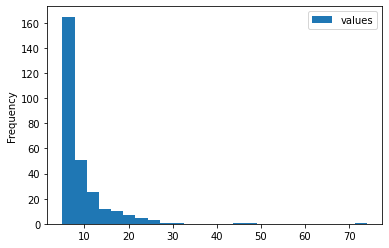

In [ ]:
relation_df.plot.hist(bins=25)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relation_df, 
                            source = "Destino", 
                            target = "Razón social:", 
                            edge_attr = "values", 
                            create_using = nx.Graph())

In [ ]:
# Graph visualization - Networkx


# plt.figure(figsize=(10,10))
# pos = nx.kamada_kawai_layout(G)
# nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
# plt.show()

In [ ]:
# Graph visualization - Pyvis
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("aena2.html")

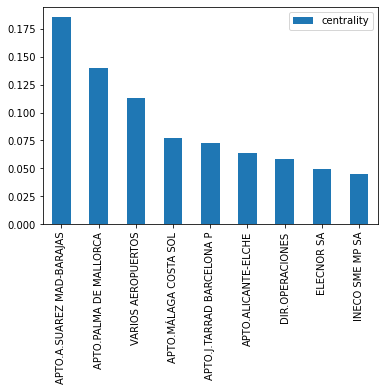

In [ ]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

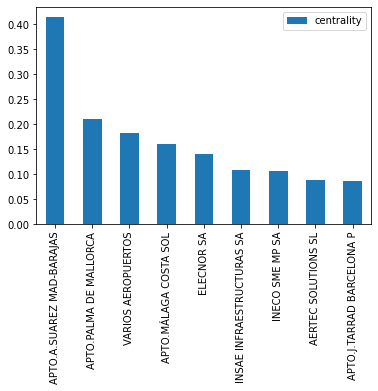

In [ ]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

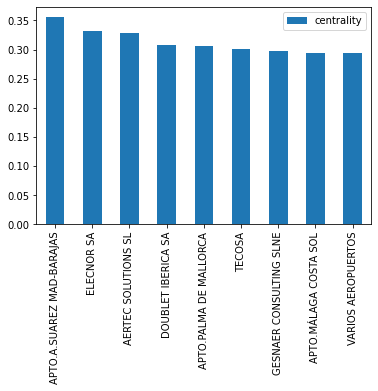

In [ ]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [ ]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [ ]:
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from community import community_louvain
# community_louvain.
communities = community_louvain.best_partition(G)
communities

In [ ]:
nx.set_node_attributes(G, communities, 'group')


In [ ]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("aena3.html")

##create embedding

### clean NLP

* Stopwords
* Stemming



In [ ]:
# create tokens from the tittles

In [ ]:
word_vectors = api.load('glove-wiki-gigaword-300')
nltk.download('punkt') #Only required the first time
nltk.download('stopwords') #Only required the first time


Creating /root/gensim-data


[==================================================] 100.0% 376.1/376.1MB downloaded


glove-wiki-gigaword-300 downloaded
loading projection weights from /root/gensim-data/glove-wiki-gigaword-300/glove-wiki-gigaword-300.gz
loaded (400000, 300) matrix from /root/gensim-data/glove-wiki-gigaword-300/glove-wiki-gigaword-300.gz
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# from gensim.models.keyedvectors import KeyedVectors
# wordvectors_file_vec = 'fasttext-sbwc.3.6.e20.vec'
# cantidad = 100000
# word_vectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

In [ ]:
stopWords = nltk.corpus.stopwords.words('spanish')
#add in stopwords the words in destino


In [ ]:
#stemmer
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [ ]:
# df['Destino'] = df['Destino'].str.lower().str.replace(".",' ')
# df['destino_token'] = df['Destino'].apply(nltk.word_tokenize)
# extra_stopwords=list(set(df['destino_token'].sum()))
# stopWords=stopWords+extra_stopwords

In [ ]:
#check all characters are in lowercase
df['Título:'] = df['Título:'].str.lower()

df['title_token'] = df['Título:'].apply(nltk.word_tokenize)

In [ ]:
def removeStopWords(words):
    removed = [w for w in words if not w in stopWords]
    
    return removed;
def removeSymbols(words):
    removed = [w for w in words if w.isalnum()]
    
    return removed;
def apply_stemmer(words):
    removed = [stemmer.stem(w) for w in words ]
    
    return removed;
df['title_token'] = df['title_token'].apply(removeStopWords)
df['title_token'] = df['title_token'].apply(removeSymbols)
#lemmatized in spanish
df['title_token'] = df['title_token'].apply(apply_stemmer)

### creating model using
https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

In [ ]:
#@title Bag of Words
import gensim
dictionary = gensim.corpora.Dictionary(df['title_token'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(3753 unique tokens: ['acust', 'aen', 'aislamient', 'aptos', 'divers']...) from 9391 documents (total 67315 corpus positions)


0 acust
1 aen
2 aislamient
3 aptos
4 divers
5 ejecu
6 fas
7 ii
8 inclu
9 plan
10 proyect


In [ ]:
dictionary = gensim.corpora.Dictionary(df['title_token'])

dictionary.filter_extremes(no_below=15, no_above=0.01)


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(3753 unique tokens: ['acust', 'aen', 'aislamient', 'aptos', 'divers']...) from 9391 documents (total 67315 corpus positions)
discarding 2973 tokens: [('aen', 1079), ('fas', 127), ('plan', 129), ('proyect', 146), ('red', 311), ('normat', 105), ('1', 181), ('grup', 181), ('plant', 99), ('repuest', 111)]...
keeping 780 tokens which were in no less than 9 and no more than 93 (=1.0%) documents
resulting dictionary: Dictionary(780 unique tokens: ['acust', 'aislamient', 'aptos', 'divers', 'ejecu']...)


For each document we create a dictionary reporting how many
words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in df['title_token']]
bow_corpus[4310]

[(2, 1), (405, 1), (412, 1), (413, 1), (435, 1), (468, 1), (470, 1), (754, 1)]

In [ ]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 2 ("aptos") appears 1 time.
Word 405 ("adaptacion") appears 1 time.
Word 412 ("agp") appears 1 time.
Word 413 ("alc") appears 1 time.
Word 435 ("bcn") appears 1 time.
Word 468 ("eds") appears 1 time.
Word 470 ("sieb") appears 1 time.
Word 754 ("estandard") appears 1 time.


####TF-IDF

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

collecting document frequencies
PROGRESS: processing document #0
calculating IDF weights for 9391 documents and 779 features (21322 matrix non-zeros)


[(0, 0.5513630378401752),
 (1, 0.5286813443678336),
 (2, 0.24837897978346546),
 (3, 0.23368055400989318),
 (4, 0.24488832048780484),
 (5, 0.2378549598290833),
 (6, 0.30018858374557933),
 (7, 0.30583927226996027)]


Running LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

using symmetric alpha at 0.1
using symmetric eta at 0.1
using serial LDA version on this node
running online LDA training, 10 topics, 2 passes over the supplied corpus of 9391 documents, updating every 4000 documents, evaluating every ~9391 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 2 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/9391, outstanding queue size 1
PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/9391, outstanding queue size 2
PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/9391, outstanding queue size 3
PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/9391, outstanding queue size 4
PROGRESS: pass 0, dispatched chunk #4 = documents up to #9391/9391, outstanding queue size 5
merging changes from 4000 documents into a model of 9391 documents
top

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

topic #0 (0.100): 0.081*"fij" + 0.024*"equipaj" + 0.023*"residu" + 0.022*"lad" + 0.018*"apto" + 0.018*"superfici" + 0.016*"realiz" + 0.014*"recog" + 0.013*"tratamient" + 0.012*"climatizacion"
topic #1 (0.100): 0.022*"jurid" + 0.022*"asturi" + 0.021*"zaragoz" + 0.018*"defens" + 0.016*"almacen" + 0.015*"vestuari" + 0.015*"estudi" + 0.014*"call" + 0.014*"redaccion" + 0.013*"autoextintor"
topic #2 (0.100): 0.035*"formacion" + 0.029*"ascensor" + 0.028*"proces" + 0.027*"contrat" + 0.021*"escaler" + 0.021*"mecan" + 0.018*"aere" + 0.018*"seleccion" + 0.017*"proveedor" + 0.016*"transit"
topic #3 (0.100): 0.051*"carr" + 0.050*"portaequipaj" + 0.036*"recint" + 0.033*"desfibril" + 0.024*"barcelon" + 0.021*"ilumin" + 0.020*"año" + 0.019*"energet" + 0.018*"eficient" + 0.017*"tecnolog"
topic #4 (0.100): 0.027*"vip" + 0.026*"implant" + 0.022*"modul" + 0.017*"carg" + 0.015*"licenci" + 0.015*"tarjet" + 0.014*"general" + 0.014*"apto" + 0.012*"melill" + 0.012*"serv"
topic #5 (0.100): 0.041*"viaj" + 0.034*

Topic: 0 
Words: 0.081*"fij" + 0.024*"equipaj" + 0.023*"residu" + 0.022*"lad" + 0.018*"apto" + 0.018*"superfici" + 0.016*"realiz" + 0.014*"recog" + 0.013*"tratamient" + 0.012*"climatizacion"
Topic: 1 
Words: 0.022*"jurid" + 0.022*"asturi" + 0.021*"zaragoz" + 0.018*"defens" + 0.016*"almacen" + 0.015*"vestuari" + 0.015*"estudi" + 0.014*"call" + 0.014*"redaccion" + 0.013*"autoextintor"
Topic: 2 
Words: 0.035*"formacion" + 0.029*"ascensor" + 0.028*"proces" + 0.027*"contrat" + 0.021*"escaler" + 0.021*"mecan" + 0.018*"aere" + 0.018*"seleccion" + 0.017*"proveedor" + 0.016*"transit"
Topic: 3 
Words: 0.051*"carr" + 0.050*"portaequipaj" + 0.036*"recint" + 0.033*"desfibril" + 0.024*"barcelon" + 0.021*"ilumin" + 0.020*"año" + 0.019*"energet" + 0.018*"eficient" + 0.017*"tecnolog"
Topic: 4 
Words: 0.027*"vip" + 0.026*"implant" + 0.022*"modul" + 0.017*"carg" + 0.015*"licenci" + 0.015*"tarjet" + 0.014*"general" + 0.014*"apto" + 0.012*"melill" + 0.012*"serv"
Topic: 5 
Words: 0.041*"viaj" + 0.034*"lanza

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

using symmetric alpha at 0.1
using symmetric eta at 0.1
using serial LDA version on this node
running online LDA training, 10 topics, 2 passes over the supplied corpus of 9391 documents, updating every 8000 documents, evaluating every ~9391 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 4 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/9391, outstanding queue size 1
PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/9391, outstanding queue size 2
PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/9391, outstanding queue size 3
PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/9391, outstanding queue size 4
PROGRESS: pass 0, dispatched chunk #4 = documents up to #9391/9391, outstanding queue size 5
topic #5 (0.100): 0.020*"pasaport" + 0.015*"integr" + 0.014*"santiag" 

Topic: 0 Word: 0.018*"baj" + 0.016*"jurid" + 0.016*"modul" + 0.015*"tension" + 0.014*"defens" + 0.013*"urbaniz" + 0.013*"ascensor" + 0.012*"mecan" + 0.012*"sei" + 0.012*"escaler"
Topic: 1 Word: 0.017*"vip" + 0.016*"sai" + 0.016*"brav" + 0.014*"tic" + 0.013*"sev" + 0.011*"call" + 0.010*"desinfeccion" + 0.010*"abiert" + 0.010*"transform" + 0.010*"giron"
Topic: 2 Word: 0.024*"centralit" + 0.023*"asturi" + 0.023*"carr" + 0.022*"portaequipaj" + 0.020*"electromecan" + 0.017*"lags" + 0.014*"liger" + 0.013*"san" + 0.012*"rx" + 0.012*"jerez"
Topic: 3 Word: 0.023*"viaj" + 0.018*"lad" + 0.016*"cctv" + 0.015*"construccion" + 0.014*"vip" + 0.012*"retir" + 0.012*"cubiert" + 0.011*"contrat" + 0.011*"tribunal" + 0.011*"procur"
Topic: 4 Word: 0.041*"licenci" + 0.030*"calid" + 0.025*"mobiliari" + 0.018*"remodel" + 0.015*"adecuacion" + 0.013*"electrogen" + 0.011*"analisis" + 0.011*"infraestructur" + 0.010*"reform" + 0.010*"reus"
Topic: 5 Word: 0.025*"pasaport" + 0.018*"integr" + 0.017*"santiag" + 0.017*"

In [ ]:
df['title_token'][4310]

['adaptacion',
 'sieb',
 'aptos',
 'red',
 'aen',
 'nuev',
 'eds',
 'estandard',
 'alc',
 'bcn',
 'agp',
 '2',
 'fuerteventur']

In [ ]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 6)))


Score: 0.8999964594841003	 
Topic: 0.027*"vip" + 0.026*"implant" + 0.022*"modul" + 0.017*"carg" + 0.015*"licenci" + 0.015*"tarjet"

Score: 0.011112578213214874	 
Topic: 0.038*"aislamient" + 0.037*"acust" + 0.026*"ejecu" + 0.025*"ii" + 0.024*"17" + 0.019*"aptos"

Score: 0.01111200638115406	 
Topic: 0.079*"centralit" + 0.034*"jerez" + 0.024*"tension" + 0.023*"baj" + 0.020*"electromecan" + 0.020*"puert"

Score: 0.01111157052218914	 
Topic: 0.081*"fij" + 0.024*"equipaj" + 0.023*"residu" + 0.022*"lad" + 0.018*"apto" + 0.018*"superfici"

Score: 0.011111337691545486	 
Topic: 0.041*"viaj" + 0.034*"lanzarot" + 0.022*"general" + 0.019*"product" + 0.019*"alquil" + 0.018*"integr"

Score: 0.011111278086900711	 
Topic: 0.048*"viaj" + 0.019*"asoci" + 0.019*"tic" + 0.018*"atcv" + 0.017*"urbaniz" + 0.016*"poliz"

Score: 0.011111236177384853	 
Topic: 0.057*"tierr" + 0.054*"ramp" + 0.053*"tercer" + 0.049*"categori" + 0.042*"l3" + 0.040*"garret"

Score: 0.011111227795481682	 
Topic: 0.022*"jurid" + 0.022

In [ ]:
lda_model.print_topics()


topic #0 (0.100): 0.081*"fij" + 0.024*"equipaj" + 0.023*"residu" + 0.022*"lad" + 0.018*"apto" + 0.018*"superfici" + 0.016*"realiz" + 0.014*"recog" + 0.013*"tratamient" + 0.012*"climatizacion"
topic #1 (0.100): 0.022*"jurid" + 0.022*"asturi" + 0.021*"zaragoz" + 0.018*"defens" + 0.016*"almacen" + 0.015*"vestuari" + 0.015*"estudi" + 0.014*"call" + 0.014*"redaccion" + 0.013*"autoextintor"
topic #2 (0.100): 0.035*"formacion" + 0.029*"ascensor" + 0.028*"proces" + 0.027*"contrat" + 0.021*"escaler" + 0.021*"mecan" + 0.018*"aere" + 0.018*"seleccion" + 0.017*"proveedor" + 0.016*"transit"
topic #3 (0.100): 0.051*"carr" + 0.050*"portaequipaj" + 0.036*"recint" + 0.033*"desfibril" + 0.024*"barcelon" + 0.021*"ilumin" + 0.020*"año" + 0.019*"energet" + 0.018*"eficient" + 0.017*"tecnolog"
topic #4 (0.100): 0.027*"vip" + 0.026*"implant" + 0.022*"modul" + 0.017*"carg" + 0.015*"licenci" + 0.015*"tarjet" + 0.014*"general" + 0.014*"apto" + 0.012*"melill" + 0.012*"serv"
topic #5 (0.100): 0.041*"viaj" + 0.034*

[(0,
  '0.081*"fij" + 0.024*"equipaj" + 0.023*"residu" + 0.022*"lad" + 0.018*"apto" + 0.018*"superfici" + 0.016*"realiz" + 0.014*"recog" + 0.013*"tratamient" + 0.012*"climatizacion"'),
 (1,
  '0.022*"jurid" + 0.022*"asturi" + 0.021*"zaragoz" + 0.018*"defens" + 0.016*"almacen" + 0.015*"vestuari" + 0.015*"estudi" + 0.014*"call" + 0.014*"redaccion" + 0.013*"autoextintor"'),
 (2,
  '0.035*"formacion" + 0.029*"ascensor" + 0.028*"proces" + 0.027*"contrat" + 0.021*"escaler" + 0.021*"mecan" + 0.018*"aere" + 0.018*"seleccion" + 0.017*"proveedor" + 0.016*"transit"'),
 (3,
  '0.051*"carr" + 0.050*"portaequipaj" + 0.036*"recint" + 0.033*"desfibril" + 0.024*"barcelon" + 0.021*"ilumin" + 0.020*"año" + 0.019*"energet" + 0.018*"eficient" + 0.017*"tecnolog"'),
 (4,
  '0.027*"vip" + 0.026*"implant" + 0.022*"modul" + 0.017*"carg" + 0.015*"licenci" + 0.015*"tarjet" + 0.014*"general" + 0.014*"apto" + 0.012*"melill" + 0.012*"serv"'),
 (5,
  '0.041*"viaj" + 0.034*"lanzarot" + 0.022*"general" + 0.019*"product

In [ ]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.5254015326499939	 
Topic: 0.023*"viaj" + 0.018*"lad" + 0.016*"cctv" + 0.015*"construccion" + 0.014*"vip" + 0.012*"retir" + 0.012*"cubiert" + 0.011*"contrat" + 0.011*"tribunal" + 0.011*"procur"

Score: 0.3857007622718811	 
Topic: 0.025*"pasaport" + 0.018*"integr" + 0.017*"santiag" + 0.017*"adapt" + 0.016*"t4" + 0.015*"scad" + 0.014*"atcv" + 0.014*"product" + 0.013*"perimetral" + 0.012*"superfici"

Score: 0.011113139800727367	 
Topic: 0.017*"vip" + 0.016*"sai" + 0.016*"brav" + 0.014*"tic" + 0.013*"sev" + 0.011*"call" + 0.010*"desinfeccion" + 0.010*"abiert" + 0.010*"transform" + 0.010*"giron"

Score: 0.011113078333437443	 
Topic: 0.041*"licenci" + 0.030*"calid" + 0.025*"mobiliari" + 0.018*"remodel" + 0.015*"adecuacion" + 0.013*"electrogen" + 0.011*"analisis" + 0.011*"infraestructur" + 0.010*"reform" + 0.010*"reus"

Score: 0.011112777516245842	 
Topic: 0.017*"malag" + 0.016*"element" + 0.014*"call" + 0.013*"zaragoz" + 0.013*"calz" + 0.013*"baliz" + 0.012*"correct" + 0.010*"regene

In [ ]:

for i,sentence_tokenized in enumerate(df['title_token']):
    bow_vector = dictionary.doc2bow(sentence_tokenized)
    for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
        print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index )))
    df.loc[i,'topic']=index
    df.loc[i,'confidence']=score

Se han truncado las últimas 5000 líneas del flujo de salida.
Score: 0.025000307708978653	 Topic: 0.048*"viaj" + 0.019*"asoci" + 0.019*"tic" + 0.018*"atcv" + 0.017*"urbaniz" + 0.016*"poliz" + 0.015*"t4" + 0.014*"visual" + 0.014*"ayud" + 0.013*"santiag"
Score: 0.02500012144446373	 Topic: 0.081*"fij" + 0.024*"equipaj" + 0.023*"residu" + 0.022*"lad" + 0.018*"apto" + 0.018*"superfici" + 0.016*"realiz" + 0.014*"recog" + 0.013*"tratamient" + 0.012*"climatizacion"
Score: 0.025000037625432014	 Topic: 0.038*"aislamient" + 0.037*"acust" + 0.026*"ejecu" + 0.025*"ii" + 0.024*"17" + 0.019*"aptos" + 0.019*"divers" + 0.018*"inclu" + 0.017*"viviend" + 0.014*"señaliz"
Score: 0.02500000037252903	 Topic: 0.022*"jurid" + 0.022*"asturi" + 0.021*"zaragoz" + 0.018*"defens" + 0.016*"almacen" + 0.015*"vestuari" + 0.015*"estudi" + 0.014*"call" + 0.014*"redaccion" + 0.013*"autoextintor"
Score: 0.02500000037252903	 Topic: 0.035*"formacion" + 0.029*"ascensor" + 0.028*"proces" + 0.027*"contrat" + 0.021*"escaler" + 0

In [ ]:
df.head()

Fecha de Contrato   Nº Expediente                    Destino  \
0               NaT  DPM-280/2014-2         VARIOS AEROPUERTOS   
1        2022-06-21     TFN-21/2022        APTO.TENERIFE NORTE   
2        2022-06-21  BCN-156/2022-1  APTO.J.TARRAD BARCELONA P   
3        2022-06-17     GRO-66/2022    APTO.GIRONA-COSTA BRAVA   
4        2022-06-17     PMI-42/2022     APTO.PALMA DE MALLORCA   

   Importe bruto adjudicación(€)  Importe neto adjudicación(€)  \
0                           0.00                          0.00   
1                      200732.00                     187600.00   
2                       17787.00                      14700.00   
3                      118399.58                      97850.89   
4                       78650.70                      65000.58   

   Valor estimado contrato neto(€)  \
0                       4000000.00   
1                        227690.00   
2                         17459.00   
3                         99000.00   
4                         76471.27   

                                             Título: Fecha de inicio  \
0  a.m. proyecto y ejecución aislamiento acústico...             NaT   
1  adaptación al cumplimiento de normativa entry-...      2023-07-21   
2  suministro de repuestos para los grupos electr...      2022-07-21   
3  actualización del sistema gemyc y adaptación a...      2022-06-27   
4  nueva climatización en salas vip del aeropuert...      2022-06-17   

  Fecha fin actual  Importe bruto licitación:  ...  \
0       2018-03-26                 4840000.00  ...   
1       2023-11-21                  243628.30  ...   
2       2022-09-21                   21125.39  ...   
3       2022-10-27                  119790.00  ...   
4       2022-10-17                   92530.24  ...   

                           Forma adjudicación:  Número de licitadores:  \
0  PROCEDIMIENTO DE LICITACIÓN CON NEGOCIACIÓN                       9   
1       PROCEDIMIENTO ABIERTO VARIOS CRITERIOS                       4   
2           PROCEDIMIENTO ABIERTO SIMPLIFICADO                       1   
3           PROCEDIMIENTO ABIERTO SIMPLIFICADO                       1   
4           PROCEDIMIENTO ABIERTO SIMPLIFICADO                       4   

   Incidencias del contrato:         NIF        Razón social:  Unnamed: 26  \
0                          0         NaN                  NaN          NaN   
1                          0  B076675735  INTEDESER GLOBAL SL          NaN   
2                          0  B081952913      ALCANER 2000 SL          NaN   
3                          0  A019024249    AMPER SISTEMAS SA          NaN   
4                          0  U010796522   UTE EFS - EUROFRED          NaN   

  duration_days Valor estimado contrato neto(€)_per_day  \
0           NaN                                     NaN   
1         123.0                             1851.138211   
2          62.0                              281.596774   
3         122.0                              811.475410   
4         122.0                              626.813689   

                                         title_token topic  
0  [proyect, ejecu, aislamient, acust, viviend, i...   9.0  
1               [adapt, cumplimient, normat, system]   8.0  
2   [suministr, repuest, grup, electrogen, plant, 1]   4.0  
3             [actualiz, sistem, gemyc, adapt, tetr]   4.0  
4  [nuev, climatiz, sal, vip, aeropuert, palm, ma...   2.0  

[5 rows x 24 columns]

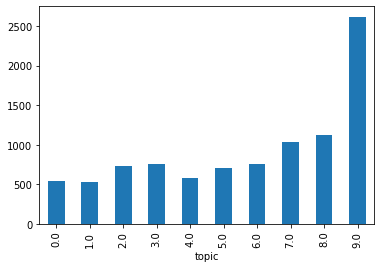

In [ ]:
df_grouped=df.groupby('topic').topic
df_grouped.count().plot(kind="bar")

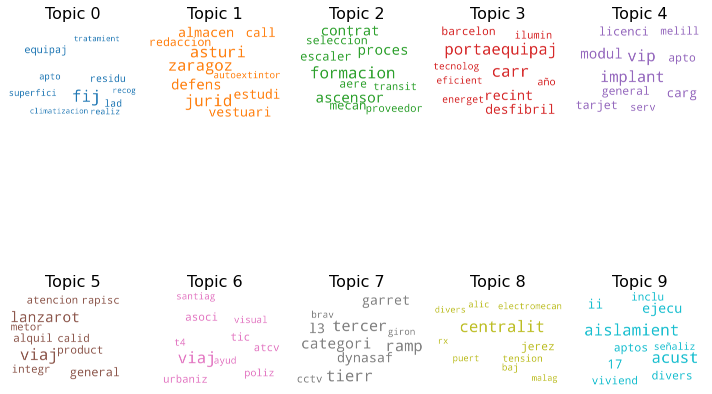

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(20,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

###using pretrained

In [ ]:
df.head()

Fecha de Contrato   Nº Expediente                    Destino  \
0               NaT  DPM-280/2014-2         VARIOS AEROPUERTOS   
1        2022-06-21     TFN-21/2022        APTO.TENERIFE NORTE   
2        2022-06-21  BCN-156/2022-1  APTO.J.TARRAD BARCELONA P   
3        2022-06-17     GRO-66/2022    APTO.GIRONA-COSTA BRAVA   
4        2022-06-17     PMI-42/2022     APTO.PALMA DE MALLORCA   

   Importe bruto adjudicación(€)  Importe neto adjudicación(€)  \
0                           0.00                          0.00   
1                      200732.00                     187600.00   
2                       17787.00                      14700.00   
3                      118399.58                      97850.89   
4                       78650.70                      65000.58   

   Valor estimado contrato neto(€)  \
0                       4000000.00   
1                        227690.00   
2                         17459.00   
3                         99000.00   
4                         76471.27   

                                             Título: Fecha de inicio  \
0  a.m. proyecto y ejecución aislamiento acústico...             NaT   
1  adaptación al cumplimiento de normativa entry-...      2023-07-21   
2  suministro de repuestos para los grupos electr...      2022-07-21   
3  actualización del sistema gemyc y adaptación a...      2022-06-27   
4  nueva climatización en salas vip del aeropuert...      2022-06-17   

  Fecha fin actual  Importe bruto licitación:  ...  \
0       2018-03-26                 4840000.00  ...   
1       2023-11-21                  243628.30  ...   
2       2022-09-21                   21125.39  ...   
3       2022-10-27                  119790.00  ...   
4       2022-10-17                   92530.24  ...   

   Valor estimado contrato neto:                          Forma adjudicación:  \
0                     4000000.00  PROCEDIMIENTO DE LICITACIÓN CON NEGOCIACIÓN   
1                      227690.00       PROCEDIMIENTO ABIERTO VARIOS CRITERIOS   
2                       17459.00           PROCEDIMIENTO ABIERTO SIMPLIFICADO   
3                       99000.00           PROCEDIMIENTO ABIERTO SIMPLIFICADO   
4                       76471.27           PROCEDIMIENTO ABIERTO SIMPLIFICADO   

   Número de licitadores:  Incidencias del contrato:         NIF  \
0                       9                          0         NaN   
1                       4                          0  B076675735   
2                       1                          0  B081952913   
3                       1                          0  A019024249   
4                       4                          0  U010796522   

         Razón social: Unnamed: 26 duration_days  \
0                  NaN         NaN           NaN   
1  INTEDESER GLOBAL SL         NaN         123.0   
2      ALCANER 2000 SL         NaN          62.0   
3    AMPER SISTEMAS SA         NaN         122.0   
4   UTE EFS - EUROFRED         NaN         122.0   

  Valor estimado contrato neto(€)_per_day  \
0                                     NaN   
1                             1851.138211   
2                              281.596774   
3                              811.475410   
4                              626.813689   

                                         title_token  
0  [proyect, ejecu, aislamient, acust, viviend, i...  
1               [adapt, cumplimient, normat, system]  
2   [suministr, repuest, grup, electrogen, plant, 1]  
3             [actualiz, sistem, gemyc, adapt, tetr]  
4  [nuev, climatiz, sal, vip, aeropuert, palm, ma...  

[5 rows x 23 columns]

In [ ]:
def embedSentence(sentence):
    embed = map(embedding, sentence)
    
    return list(embed);
def embedding(word):
    try:
        embed = word_vectors[word]
    except Exception:
        embed = word_vectors['unk'] #For any unknown words
        
    return embed;
embedded_df = df.copy()
# embedded_df=embedded_df.sample(200)
embedded_df['title_token'] = embedded_df['title_token'].apply(embedSentence)
#removes any rows that became empty after removal of stop words etc.
embedded_df = embedded_df[embedded_df['title_token'].astype(str)!='[]']
#Will be useful later for combining dataframes
keepIndices = embedded_df.index

In [ ]:
def averageEmbedding(sentence):
    average = np.mean(sentence, axis=0)
    
    return average;
embedded_df['title_token'] = embedded_df['title_token'].apply(averageEmbedding)
#Reinitializing the indices to remove any gaps
embedded_df.index = list(range(0, len(embedded_df)))
embedded_df.head()

Fecha de Contrato   Nº Expediente                    Destino  \
0               NaT  DPM-280/2014-2         VARIOS AEROPUERTOS   
1        2022-06-21     TFN-21/2022        APTO.TENERIFE NORTE   
2        2022-06-21  BCN-156/2022-1  APTO.J.TARRAD BARCELONA P   
3        2022-06-17     GRO-66/2022    APTO.GIRONA-COSTA BRAVA   
4        2022-06-17     PMI-42/2022     APTO.PALMA DE MALLORCA   

   Importe bruto adjudicación(€)  Importe neto adjudicación(€)  \
0                           0.00                          0.00   
1                      200732.00                     187600.00   
2                       17787.00                      14700.00   
3                      118399.58                      97850.89   
4                       78650.70                      65000.58   

   Valor estimado contrato neto(€)  \
0                       4000000.00   
1                        227690.00   
2                         17459.00   
3                         99000.00   
4                         76471.27   

                                             Título: Fecha de inicio  \
0  a.m. proyecto y ejecución aislamiento acústico...             NaT   
1  adaptación al cumplimiento de normativa entry-...      2023-07-21   
2  suministro de repuestos para los grupos electr...      2022-07-21   
3  actualización del sistema gemyc y adaptación a...      2022-06-27   
4  nueva climatización en salas vip del aeropuert...      2022-06-17   

  Fecha fin actual  Importe bruto licitación:  ...  \
0       2018-03-26                 4840000.00  ...   
1       2023-11-21                  243628.30  ...   
2       2022-09-21                   21125.39  ...   
3       2022-10-27                  119790.00  ...   
4       2022-10-17                   92530.24  ...   

   Valor estimado contrato neto:                          Forma adjudicación:  \
0                     4000000.00  PROCEDIMIENTO DE LICITACIÓN CON NEGOCIACIÓN   
1                      227690.00       PROCEDIMIENTO ABIERTO VARIOS CRITERIOS   
2                       17459.00           PROCEDIMIENTO ABIERTO SIMPLIFICADO   
3                       99000.00           PROCEDIMIENTO ABIERTO SIMPLIFICADO   
4                       76471.27           PROCEDIMIENTO ABIERTO SIMPLIFICADO   

   Número de licitadores:  Incidencias del contrato:         NIF  \
0                       9                          0         NaN   
1                       4                          0  B076675735   
2                       1                          0  B081952913   
3                       1                          0  A019024249   
4                       4                          0  U010796522   

         Razón social: Unnamed: 26 duration_days  \
0                  NaN         NaN           NaN   
1  INTEDESER GLOBAL SL         NaN         123.0   
2      ALCANER 2000 SL         NaN          62.0   
3    AMPER SISTEMAS SA         NaN         122.0   
4   UTE EFS - EUROFRED         NaN         122.0   

  Valor estimado contrato neto(€)_per_day  \
0                                     NaN   
1                             1851.138211   
2                              281.596774   
3                              811.475410   
4                              626.813689   

                                         title_token  
0  [0.19422473, -0.2932278, -0.115972005, -0.4947...  
1  [-0.031325005, -0.32864428, -0.16083749, -0.50...  
2  [0.13671666, -0.029253846, -0.21483983, -0.388...  
3  [0.24913196, -0.41689205, -0.108696, -0.502562...  
4  [0.10740786, -0.25071856, -0.08968, -0.4516724...  

[5 rows x 23 columns]

In [ ]:
feature_columns = []
for i in range(0, 300):
    feature_columns.append('e'+str(i))
feature_df = pd.DataFrame(columns = feature_columns)
def featurize(sentence, dataframe):
    sentence = pd.Series(sentence, index=feature_columns)
    dataframe = dataframe.append(sentence, ignore_index=True)
    
    return dataframe;
for i in range(0, len(embedded_df['title_token'])):
    feature_df = featurize(list(embedded_df['title_token'][i]), feature_df)

In [ ]:
feature_df.head()


(200, 25)


In [ ]:
temp_df = df.loc[keepIndices, :].copy()
temp_df.index = range(0, len(temp_df))
#Select the month of March 2020
# current_df = pd.concat([feature_df.loc[temp_df[(temp_df['Year']==2020)&(temp_df['Month']==3)].index,:],temp_df[(temp_df['Year']==2020)&(temp_df['Month']==3)]], axis=1)
current_df=feature_df
scaler = StandardScaler()
current_scaled_df = scaler.fit_transform(current_df.loc[:, :'e299'])


In [ ]:
tsne = TSNE(n_components=2).fit_transform(current_scaled_df)
tsne_df = pd.DataFrame(tsne, columns=['T1', 'T2'])
tsne_df = pd.concat([tsne_df, temp_df], axis=1)
tsne_df['title_token'] = tsne_df['title_token'].apply(TreebankWordDetokenizer().detokenize)
tsne_df.head()

T1         T2 Fecha de Contrato   Nº Expediente  \
0 -13.106298 -30.177504               NaT  DPM-280/2014-2   
1  10.545859 -12.965216        2022-06-21     TFN-21/2022   
2  11.721665 -37.058640        2022-06-21  BCN-156/2022-1   
3  -9.061488  37.622559        2022-06-17     GRO-66/2022   
4 -72.362656 -26.806540        2022-06-17     PMI-42/2022   

                     Destino  Importe bruto adjudicación(€)  \
0         VARIOS AEROPUERTOS                           0.00   
1        APTO.TENERIFE NORTE                      200732.00   
2  APTO.J.TARRAD BARCELONA P                       17787.00   
3    APTO.GIRONA-COSTA BRAVA                      118399.58   
4     APTO.PALMA DE MALLORCA                       78650.70   

   Importe neto adjudicación(€)  Valor estimado contrato neto(€)  \
0                          0.00                       4000000.00   
1                     187600.00                        227690.00   
2                      14700.00                         17459.00   
3                      97850.89                         99000.00   
4                      65000.58                         76471.27   

                                             Título: Fecha de inicio  ...  \
0  a.m. proyecto y ejecución aislamiento acústico...             NaT  ...   
1  adaptación al cumplimiento de normativa entry-...      2023-07-21  ...   
2  suministro de repuestos para los grupos electr...      2022-07-21  ...   
3  actualización del sistema gemyc y adaptación a...      2022-06-27  ...   
4  nueva climatización en salas vip del aeropuert...      2022-06-17  ...   

  Valor estimado contrato neto:                          Forma adjudicación:  \
0                    4000000.00  PROCEDIMIENTO DE LICITACIÓN CON NEGOCIACIÓN   
1                     227690.00       PROCEDIMIENTO ABIERTO VARIOS CRITERIOS   
2                      17459.00           PROCEDIMIENTO ABIERTO SIMPLIFICADO   
3                      99000.00           PROCEDIMIENTO ABIERTO SIMPLIFICADO   
4                      76471.27           PROCEDIMIENTO ABIERTO SIMPLIFICADO   

   Número de licitadores:  Incidencias del contrato:         NIF  \
0                       9                          0         NaN   
1                       4                          0  B076675735   
2                       1                          0  B081952913   
3                       1                          0  A019024249   
4                       4                          0  U010796522   

         Razón social: Unnamed: 26  duration_days  \
0                  NaN         NaN            NaN   
1  INTEDESER GLOBAL SL         NaN          123.0   
2      ALCANER 2000 SL         NaN           62.0   
3    AMPER SISTEMAS SA         NaN          122.0   
4   UTE EFS - EUROFRED         NaN          122.0   

  Valor estimado contrato neto(€)_per_day  \
0                                     NaN   
1                             1851.138211   
2                              281.596774   
3                              811.475410   
4                              626.813689   

                                         title_token  
0  proyect ejecu aislamient acust viviend inclu d...  
1                    adapt cumplimient normat system  
2          suministr repuest grup electrogen plant 1  
3                   actualiz sistem gemyc adapt tetr  
4       nuev climatiz sal vip aeropuert palm mallorc  

[5 rows x 25 columns]

In [ ]:
def plot_words(dataframe, fileCount=0):    
    plt.figure(num=None, figsize=(12,8), dpi=300)
    ax = plt.subplot(111)
    for i in range(dataframe.shape[0]):
        plt.text(dataframe.iloc[i,0], dataframe.iloc[i,1],    str(dataframe.iloc[i,-1]),
                color='blue',
                fontdict={'weight': 'light', 'size':6})
    
    plt.axis('off')
    plt.savefig(fname='plot'+str(fileCount), dpi=300)
scaler = MinMaxScaler()
data = scaler.fit_transform(tsne_df.iloc[:, [0,1]])
tsne_df.iloc[:, [0,1]] = data

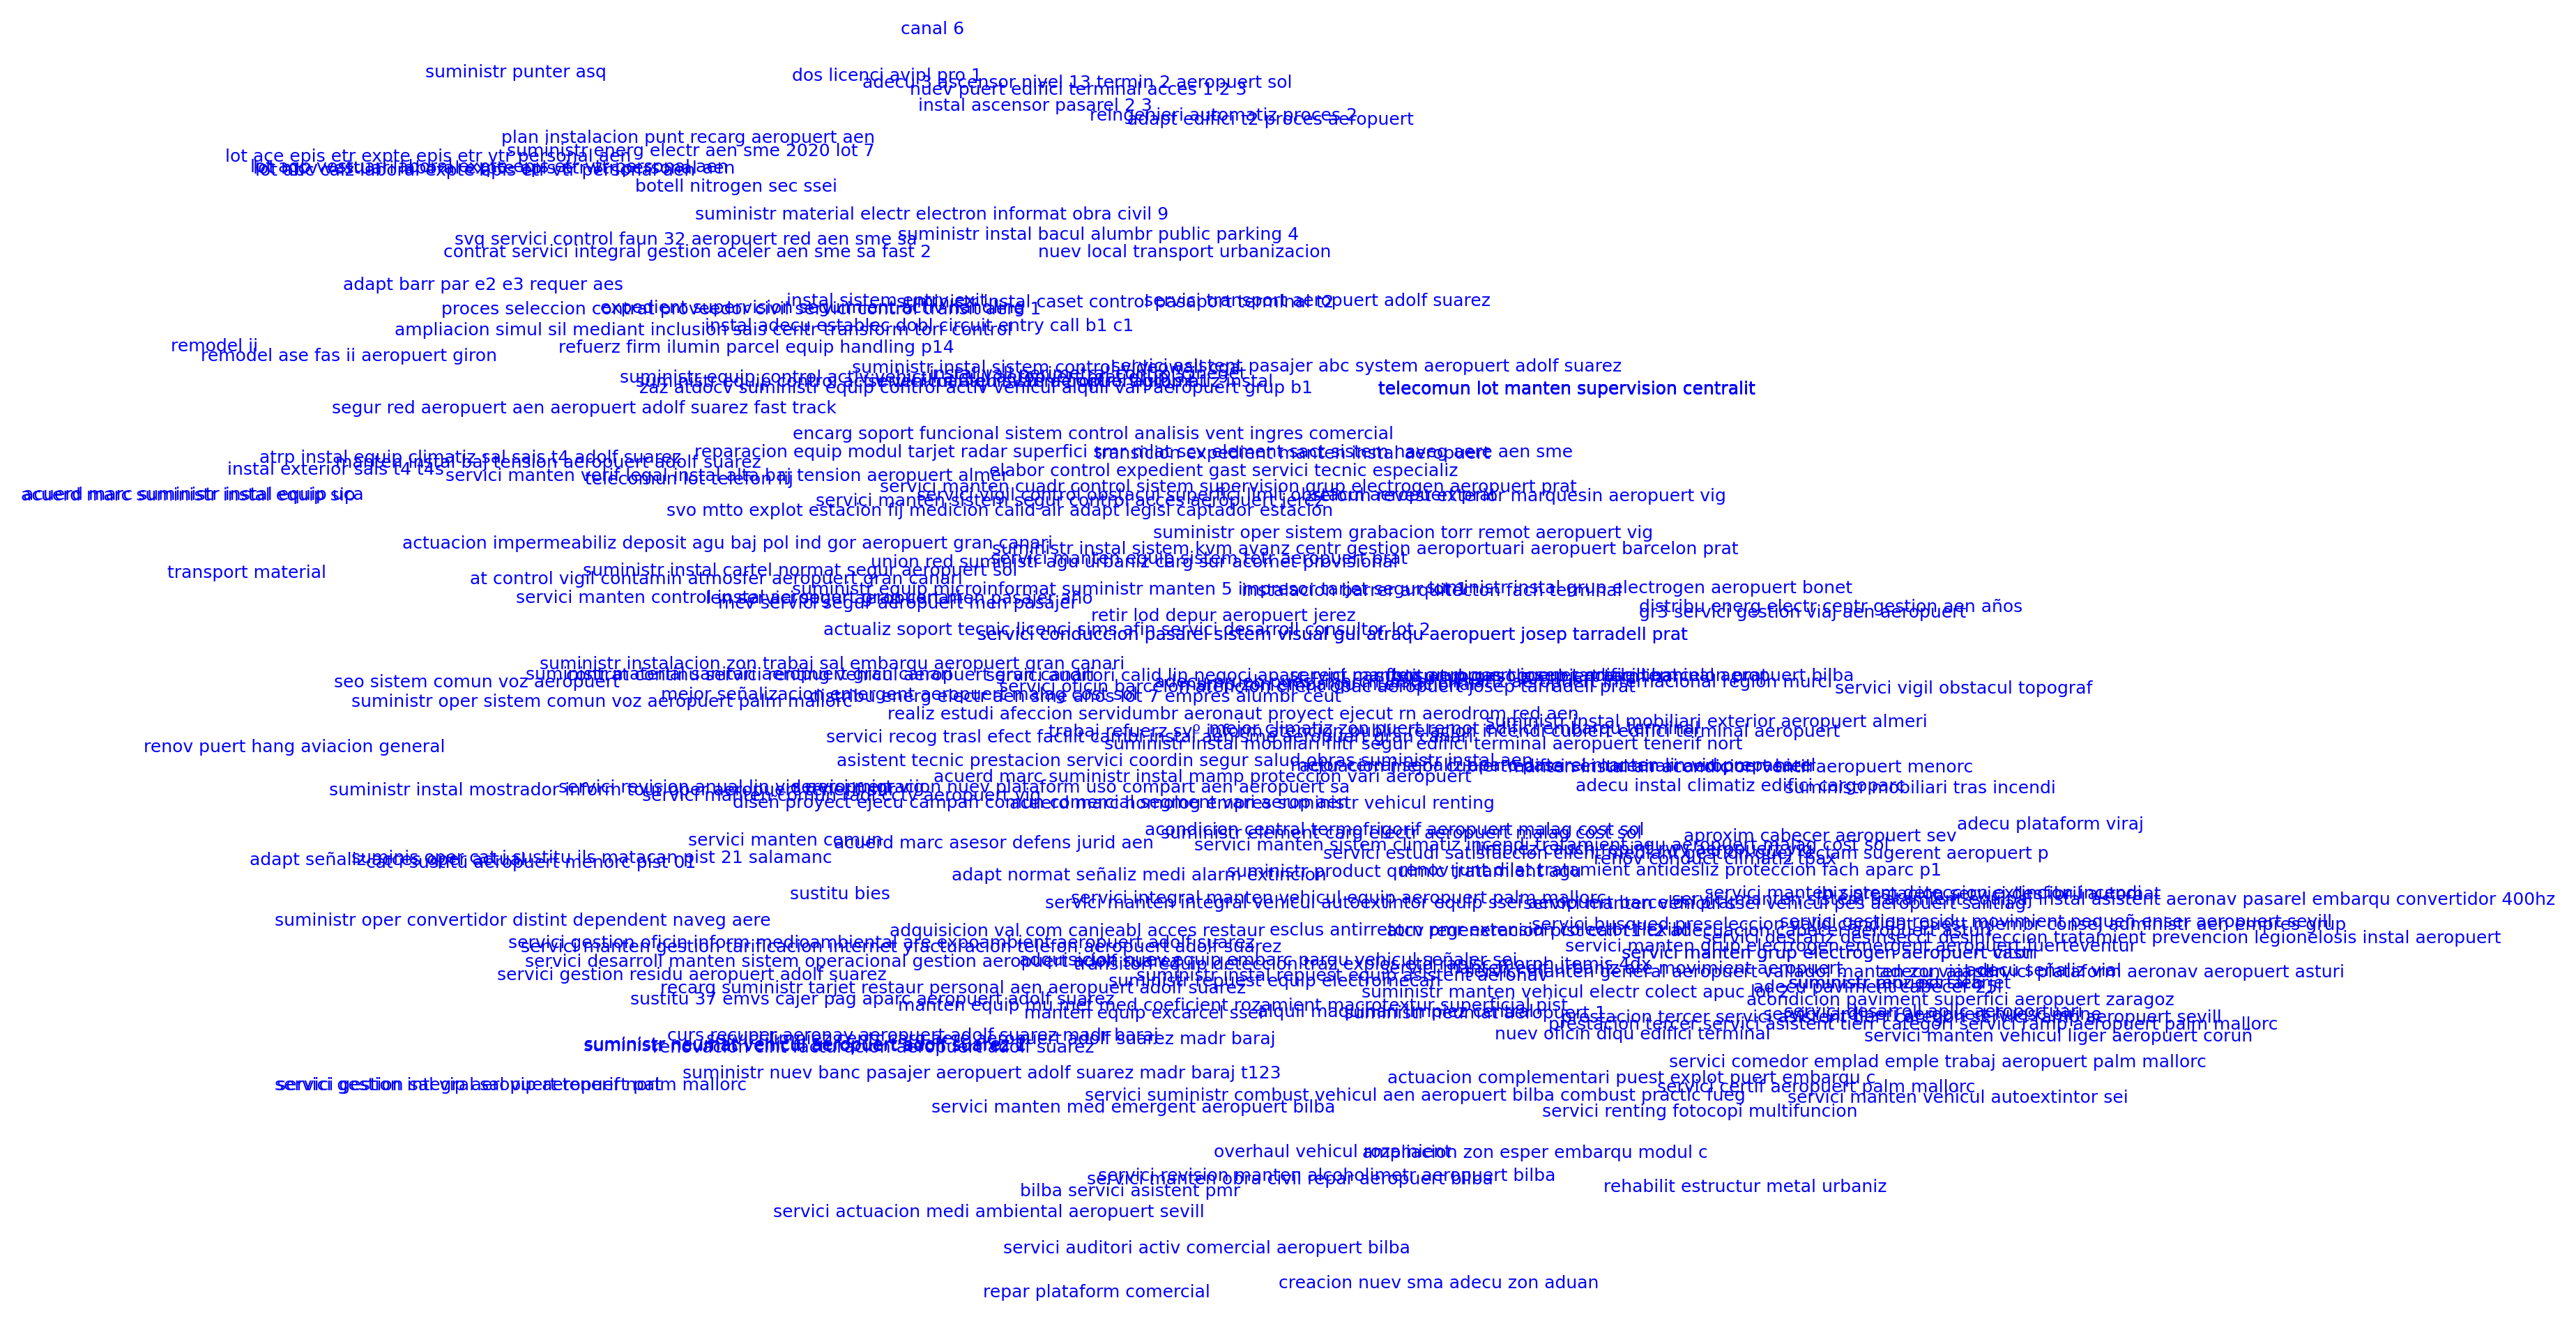

In [ ]:

plot_words(tsne_df.sample(200))

In [ ]:
plot_words(tsne_df)

In [ ]:
current_scaled_df.shape

(200, 300)

In [ ]:
from pycaret.clustering import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
s = setup(feature_df, normalize = True,silent=True)


In [ ]:
for ncluster in range(2,25):
    print(ncluster)
    # kmeans=create_model('kmeans',ncluster)
    kmodes=create_model('kmodes',ncluster)

In [ ]:
model=kmodes

In [ ]:
get_config('display_container')

    Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
 0      0.0829             20.826          2.6675            0           0   
 
    Completeness  
 0             0  ,
    Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
 0      0.0855             17.399          2.5874            0           0   
 
    Completeness  
 0             0  ,
    Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
 0      0.0855             17.399          2.5874            0           0   
 
    Completeness  
 0             0  ,
    Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
 0      0.1299            36.0449          2.2222            0           0   
 
    Completeness  
 0             0  ,
    Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
 0      0.1169            25.2394          2.6854            0           0   
 
    Completeness  
 0             0  ,
    Silhouette 

In [ ]:
plot_model(model,'cluster')

In [ ]:
plot_model(model,'tsne')

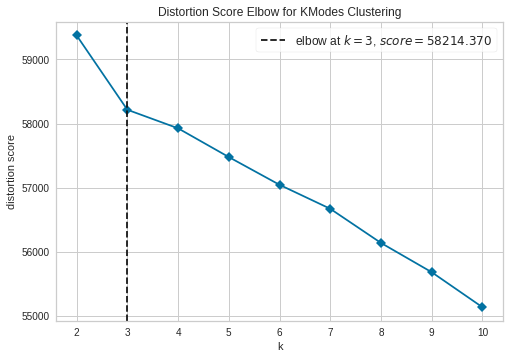

In [ ]:
plot_model(model,'elbow')

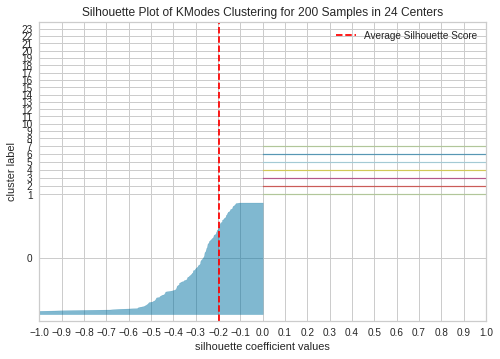

In [ ]:
plot_model(model,'silhouette')

In [ ]:
plot_model(model,'distance')

In [ ]:
plot_model(model,'distribution')

### creating my owm embbeding

In [ ]:

import itertools
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm
# Deep learning: 

from keras.models import Input, Model
from  keras.layers import Dense

from scipy import sparse



In [ ]:
#@title Custom functions
import re
import numpy as np

def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })

    return unique_word_dict    

def text_preprocessing(
    text:list,
    punctuations = r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
    stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will']
    )->list:
    """
    A method to preproces text
    """
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list 
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x!='']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text

# Functions to find the most similar word 
def euclidean(vec1:np.array, vec2:np.array) -> float:
    """
    A function to calculate the euclidean distance between two vectors
    """
    return np.sqrt(np.sum((vec1 - vec2)**2))

def find_similar(word:str, embedding_dict:dict, top_n=10)->list:
    """
    A method to find the most similar word based on the learnt embeddings
    """
    dist_dict = {}
    word_vector = embedding_dict.get(word, [])
    if len(word_vector) > 0:
        for key, value in embedding_dict.items():
            if key!=word:
                dist = euclidean(word_vector, value)
                dist_dict.update({
                    key: dist
                })

        return sorted(dist_dict.items(), key=lambda x: x[1])[0:top_n]       

In [ ]:
df.head(1)

Fecha de Contrato   Nº Expediente             Destino  \
0               NaT  DPM-280/2014-2  VARIOS AEROPUERTOS   

   Importe bruto adjudicación(€)  Importe neto adjudicación(€)  \
0                            0.0                           0.0   

   Valor estimado contrato neto(€)  \
0                        4000000.0   

                                             Título: Fecha de inicio  \
0  a.m. proyecto y ejecución aislamiento acústico...             NaT   

  Fecha fin actual  Importe bruto licitación:  ...  \
0       2018-03-26                  4840000.0  ...   

   Valor estimado contrato neto:                          Forma adjudicación:  \
0                      4000000.0  PROCEDIMIENTO DE LICITACIÓN CON NEGOCIACIÓN   

   Número de licitadores:  Incidencias del contrato:  NIF  Razón social:  \
0                       9                          0  NaN            NaN   

  Unnamed: 26 duration_days Valor estimado contrato neto(€)_per_day  \
0         NaN           NaN                                     NaN   

                                         title_token  
0  [proyect, ejecu, aislamient, acust, viviend, i...  

[1 rows x 23 columns]

In [ ]:
list_text = [x for x in df['title_token']]

In [ ]:
texts = [" ".join(x) for x in list_text ]


In [ ]:
texts

['proyect ejecu aislamient acust viviend inclu divers plan aislamient acust aptos red aen fas ii',
 'adapt cumplimient normat system',
 'suministr repuest grup electrogen plant 1',
 'actualiz sistem gemyc adapt tetr',
 'nuev climatiz sal vip aeropuert palm mallorc',
 'servici inspeccion legal manten equip respir autonom aeropuert gomer',
 'suministr tarjet band magnet proxim gripp sujecion pinz cocodril pcp',
 'obra civil acomet instalacion entry exit system',
 'adecuacion torr meg aeropuert salamanc',
 'adquisicion diferent tip papeler',
 'servici higieniz sistem climatiz',
 'nuev impermeabilizacion edifici terminal',
 'servici manten sistem segur aeropuert sevill',
 'adquisicion suministr higien desech offic servici central aen',
 'suministr decor ambient event marketing aeroportuari',
 'manten maquin tas aeropuert miguel hernandez',
 'servici recog efect entreg cambi instal aen ibiz',
 'adquisicion suministr material oficin servici central aen',
 'seguimient supervision servici asis

In [ ]:
# texts = [x for x in df['Título:']]

# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)

    # Appending to the all text list
    all_text += text 

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])

unique_word_dict = create_unique_word_dict(all_text)


In [ ]:
unique_word_dict

In [ ]:
word_lists=word_lists[:80000]

In [ ]:
# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
X_spar = sparse.csr_matrix(X)
Y_spar = sparse.csr_matrix(Y)

80000it [00:02, 28787.25it/s]


In [ ]:
a=np.stack( X, axis=0 )
a.shape

(80000, 3429)

In [ ]:
b=np.stack(Y,axis=0)

In [ ]:
#no suficiente fuerza computacional
# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input(shape=(a.shape[1],),sparse=True,dtype=tf.float64)
x = Dense(units=embed_size, activation='linear',dtype=tf.float64)(inp)
x = Dense(units=b.shape[1], activation='softmax',dtype=tf.float64)(x)
model = Model(inputs=inp, outputs=x,)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',)

# Optimizing the network weights
model.fit(
    x=a, 
    y=b, 
    batch_size=256,
    epochs=1000
    )


In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 3429)]            0         
                                                                 
 dense_8 (Dense)             (None, 2)                 6860      
                                                                 
 dense_9 (Dense)             (None, 3429)              10287     
                                                                 
Total params: 17,147
Trainable params: 17,147
Non-trainable params: 0
_________________________________________________________________


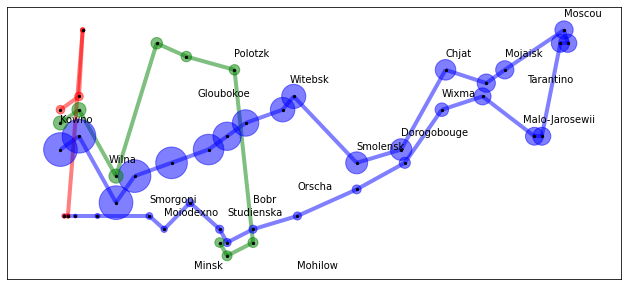

In [ ]:
##remove
import matplotlib.pyplot as plt
import networkx as nx


def minard_graph():
    data1 = """\
24.0,54.9,340000,A,1
24.5,55.0,340000,A,1
25.5,54.5,340000,A,1
26.0,54.7,320000,A,1
27.0,54.8,300000,A,1
28.0,54.9,280000,A,1
28.5,55.0,240000,A,1
29.0,55.1,210000,A,1
30.0,55.2,180000,A,1
30.3,55.3,175000,A,1
32.0,54.8,145000,A,1
33.2,54.9,140000,A,1
34.4,55.5,127100,A,1
35.5,55.4,100000,A,1
36.0,55.5,100000,A,1
37.6,55.8,100000,A,1
37.7,55.7,100000,R,1
37.5,55.7,98000,R,1
37.0,55.0,97000,R,1
36.8,55.0,96000,R,1
35.4,55.3,87000,R,1
34.3,55.2,55000,R,1
33.3,54.8,37000,R,1
32.0,54.6,24000,R,1
30.4,54.4,20000,R,1
29.2,54.3,20000,R,1
28.5,54.2,20000,R,1
28.3,54.3,20000,R,1
27.5,54.5,20000,R,1
26.8,54.3,12000,R,1
26.4,54.4,14000,R,1
25.0,54.4,8000,R,1
24.4,54.4,4000,R,1
24.2,54.4,4000,R,1
24.1,54.4,4000,R,1"""
    data2 = """\
24.0,55.1,60000,A,2
24.5,55.2,60000,A,2
25.5,54.7,60000,A,2
26.6,55.7,40000,A,2
27.4,55.6,33000,A,2
28.7,55.5,33000,R,2
29.2,54.2,30000,R,2
28.5,54.1,30000,R,2
28.3,54.2,28000,R,2"""
    data3 = """\
24.0,55.2,22000,A,3
24.5,55.3,22000,A,3
24.6,55.8,6000,A,3
24.6,55.8,6000,R,3
24.2,54.4,6000,R,3
24.1,54.4,6000,R,3"""
    cities = """\
24.0,55.0,Kowno
25.3,54.7,Wilna
26.4,54.4,Smorgoni
26.8,54.3,Moiodexno
27.7,55.2,Gloubokoe
27.6,53.9,Minsk
28.5,54.3,Studienska
28.7,55.5,Polotzk
29.2,54.4,Bobr
30.2,55.3,Witebsk
30.4,54.5,Orscha
30.4,53.9,Mohilow
32.0,54.8,Smolensk
33.2,54.9,Dorogobouge
34.3,55.2,Wixma
34.4,55.5,Chjat
36.0,55.5,Mojaisk
37.6,55.8,Moscou
36.6,55.3,Tarantino
36.5,55.0,Malo-Jarosewii"""

    c = {}
    for line in cities.split("\n"):
        x, y, name = line.split(",")
        c[name] = (float(x), float(y))

    g = []

    for data in [data1, data2, data3]:
        G = nx.Graph()
        i = 0
        G.pos = {}  # location
        G.pop = {}  # size
        last = None
        for line in data.split("\n"):
            x, y, p, r, n = line.split(",")
            G.pos[i] = (float(x), float(y))
            G.pop[i] = int(p)
            if last is None:
                last = i
            else:
                G.add_edge(i, last, **{r: int(n)})
                last = i
            i = i + 1
        g.append(G)

    return g, c


(g, city) = minard_graph()

plt.figure(1, figsize=(11, 5))
plt.clf()
colors = ["b", "g", "r"]
for G in g:
    c = colors.pop(0)
    node_size = [G.pop[n] // 300 for n in G]
    nx.draw_networkx_edges(G, G.pos, edge_color=c, width=4, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=node_size, node_color=c, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=5, node_color="k")

for c in city:
    x, y = city[c]
    plt.text(x, y + 0.1, c)
plt.show()

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDie

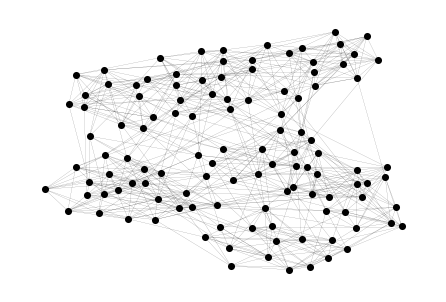

In [ ]:
"""
========
Football
========
Load football network in GML format and compute some network statistcs.
Shows how to download GML graph in a zipped file, unpack it, and load
into a NetworkX graph.
Requires Internet connection to download the URL
http://www-personal.umich.edu/~mejn/netdata/football.zip
"""

import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")

options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()